In [110]:
!pip install pymysql pandas
!pip install pymysql

In [111]:
import pandas as pd
import os
from sqlalchemy import create_engine,text
from sqlalchemy import URL, create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Database connection information

In [112]:
DB_HOST = "den1.mysql6.gear.host"
DB_NAME = "situation"
DB_USER = "situation"
DB_PASSWORD = input("Enter your database password: ")

Enter your database password:


In [113]:
# Establish connection to the database
DATABASE_URI = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}"
engine = create_engine(DATABASE_URI)

# Fetch data from the database using read_sql_table

In [114]:
df_degradation = pd.read_sql_table('g7_les_unit_operations_degradation', engine)
df_params = pd.read_sql_table('g7_les_uo_params', engine)

In [115]:
# display the first rows of the DataFrames
print("Degradation Data:")
print(df_degradation.head())

print("\nParameters Data:")
print(df_params.head())

Degradation Data:
   id reactor_robot_id experiment_group workflow_step parameter_name  \
0   1            RR101           Group2         Step1      Viscosity   
1   2            RR104           Group3         Step1      Viscosity   
2   3            RR102           Group1         Step1       Pressure   
3   4            RR101           Group2         Step1      Viscosity   
4   5            RR104           Group2         Step1       Pressure   

   parameter_value      execution_time  inefficiency_score  
0       344.139346 2024-05-13 11:30:53            0.087365  
1       218.951722 2024-05-13 11:35:53            0.023142  
2       364.330959 2024-05-13 11:40:53            0.142511  
3       274.381862 2024-05-13 11:45:53            0.096173  
4       364.520609 2024-05-13 11:50:53            0.147191  

Parameters Data:
  Unit_Operation_ID        UOName  \
0             UO001  Distillation   
1             UO002           Dry   
2             UO003        Mixing   
3             UO0

In [116]:
# display column names
print("\nColumn names of df_degradation:")
print(df_degradation.columns)

print("\nColumn names of df_params:")
print(df_params.columns)


Column names of df_degradation:
Index(['id', 'reactor_robot_id', 'experiment_group', 'workflow_step',
       'parameter_name', 'parameter_value', 'execution_time',
       'inefficiency_score'],
      dtype='object')

Column names of df_params:
Index(['Unit_Operation_ID', 'UOName', 'UODescription', 'UOParams'], dtype='object')


# CSV files

In [117]:
# reate CSV files
df_degradation.to_csv("g7_les_unit_operations_degradation.csv", index=False)
df_params.to_csv("g7_les_uo_params.csv", index=False)

In [118]:
# read CSV files
read_df_degradation = pd.read_csv("g7_les_unit_operations_degradation.csv")
read_df_params = pd.read_csv("g7_les_uo_params.csv")

In [119]:
# display the first rows of the read DataFrames
print("\nRead Degradation Data:")
print(read_df_degradation.head())

print("\nRead Parameters Data:")
print(read_df_params.head())


Read Degradation Data:
   id reactor_robot_id experiment_group workflow_step parameter_name  \
0   1            RR101           Group2         Step1      Viscosity   
1   2            RR104           Group3         Step1      Viscosity   
2   3            RR102           Group1         Step1       Pressure   
3   4            RR101           Group2         Step1      Viscosity   
4   5            RR104           Group2         Step1       Pressure   

   parameter_value       execution_time  inefficiency_score  
0       344.139346  2024-05-13 11:30:53            0.087365  
1       218.951722  2024-05-13 11:35:53            0.023142  
2       364.330959  2024-05-13 11:40:53            0.142511  
3       274.381862  2024-05-13 11:45:53            0.096173  
4       364.520609  2024-05-13 11:50:53            0.147191  

Read Parameters Data:
  Unit_Operation_ID        UOName  \
0             UO001  Distillation   
1             UO002           Dry   
2             UO003        Mixing   


# Extract features and target variable

In [120]:
if 'UOParams' in df_params.columns:
    features = df_params[['UOParams']]
else:
    print("Column 'UOParams' not found in df_params. Available columns are:", df_params.columns)
    features = pd.DataFrame()  # Empty DataFrame for features

if 'inefficiency_score' in df_degradation.columns:
    target = df_degradation['inefficiency_score']
else:
    print("Column 'inefficiency_score' not found in df_degradation. Available columns are:", df_degradation.columns)
    target = pd.Series()  # Empty Series for target

print("\nFeatures:")
if not features.empty:
    print(features.head())
else:
    print("No features available.")

print("\nTarget:")
if not target.empty:
    print(target.head())
else:
    print("No target variable available.")


Features:
                                            UOParams
0  ['Mixture', 'Temperature', 'Pressure', 'Heatin...
1  ['Product', 'DryingMethod', 'DryingTemperature...
2  [{'Ingredients' : {'Ingredient': {'Name', 'Qua...
3  ['MaterialToBeWashed', 'Impurities', 'WashingS...
4  ['Substance', 'Amount', 'Duration', 'BalanceTy...

Target:
0    0.087365
1    0.023142
2    0.142511
3    0.096173
4    0.147191
Name: inefficiency_score, dtype: float64


# Analyze the data


In [121]:
# Define minimum and maximum values
min_values = {
    "id": 1,
    "reactor_robot_id": "RR101",
    "experiment_group": "Group1",
    "workflow_step": "Step1",
    "parameter_name": "Pressure",
    "parameter_value": 105.757959,
    "execution_time": "2024-05-13 11:30:53",
    "inefficiency_score": 0.012226
}

max_values = {
    "id": 44,
    "reactor_robot_id": "RR104",
    "experiment_group": "Group3",
    "workflow_step": "Step3",
    "parameter_name": "Viscosity",
    "parameter_value": 399.654102,
    "execution_time": "2024-05-13 15:05:53",
    "inefficiency_score": 0.195349
}

# Create a DataFrame
df = pd.DataFrame([min_values, max_values], index=['Minimum', 'Maximum'])

# Transpose the DataFrame
df = df.T

# Display the table
print(df)

                                Minimum              Maximum
id                                    1                   44
reactor_robot_id                  RR101                RR104
experiment_group                 Group1               Group3
workflow_step                     Step1                Step3
parameter_name                 Pressure            Viscosity
parameter_value              105.757959           399.654102
execution_time      2024-05-13 11:30:53  2024-05-13 15:05:53
inefficiency_score             0.012226             0.195349


In [122]:
# Basic analysis
print("\nBasic Analysis:")
print("Number of records in df_degradation:", len(df_degradation))
print("Number of records in df_params:", len(df_params))


Basic Analysis:
Number of records in df_degradation: 44
Number of records in df_params: 12


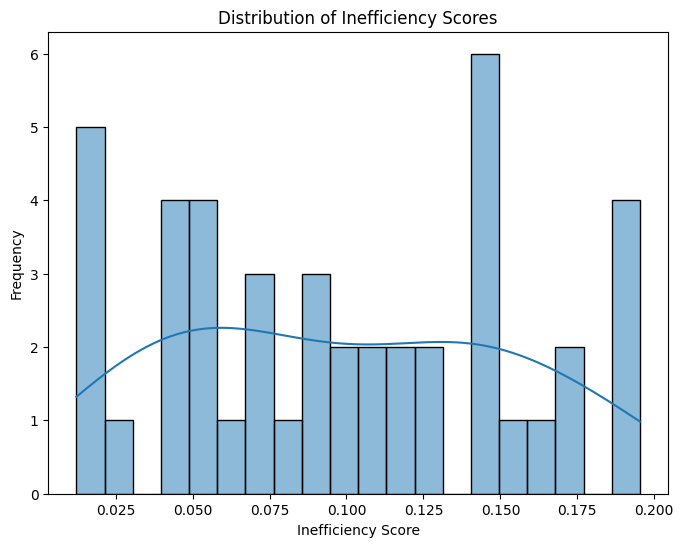

In [123]:
# Distribution of inefficiency scores
plt.figure(figsize=(8, 6))
sns.histplot(df_degradation['inefficiency_score'], bins=20, kde=True)
plt.title('Distribution of Inefficiency Scores')
plt.xlabel('Inefficiency Score')
plt.ylabel('Frequency')
plt.show()

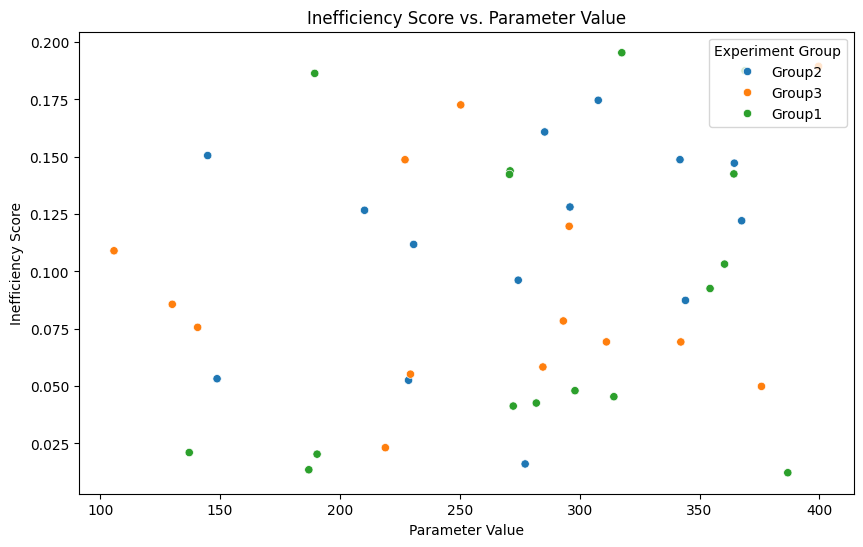

In [124]:
# Relationship between inefficiency score and parameter value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_degradation, x='parameter_value', y='inefficiency_score', hue='experiment_group')
plt.title('Inefficiency Score vs. Parameter Value')
plt.xlabel('Parameter Value')
plt.ylabel('Inefficiency Score')
plt.legend(title='Experiment Group', loc='upper right')
plt.show()


In [125]:
# Drop non-numeric columns
numeric_cols = df_degradation.select_dtypes(include=['number']).columns
df_numeric = df_degradation[numeric_cols]

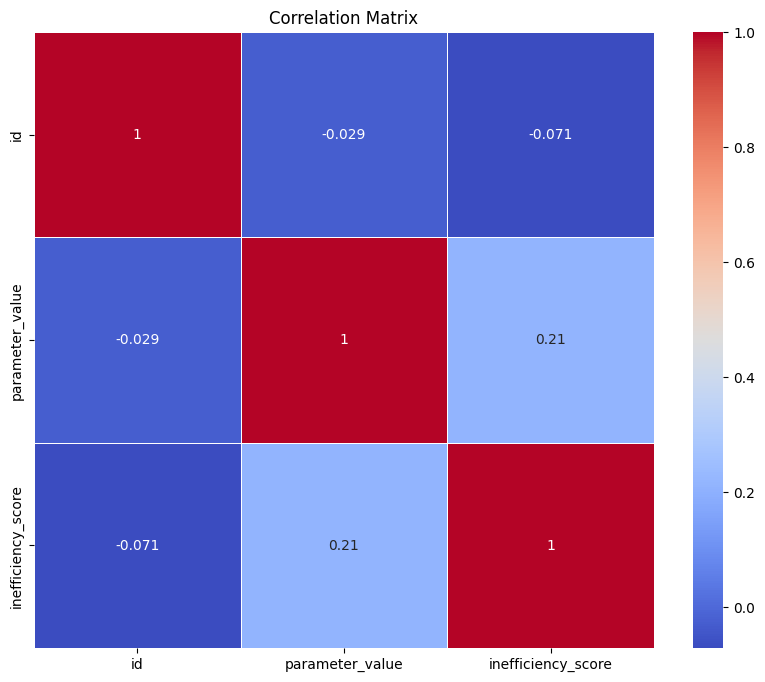

In [126]:
# Correlation matrix for num var
numerical_columns = df_degradation.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_degradation[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()